This notebook is just here for my convenience to test my code without having to always open a new windon

In [3]:
X_min = -0.2
X_max = R + 0.5
Y_min = -R-0.2
Y_max = 0.2

In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:

li = [[1, 0], [0.5, -2], [2,0.3]]

d = dict()


for i in range(len(li[0])):
    d[i] = []

    for j in range(len(li)):
        try:
            d[i].append(li[j][i])
        except IndexError:
            d[i].append(0)

B = d[0]

try:
    G = d[1]
except KeyError:
    G = []
    for i in range(len(li)):
        G.append(0)



In [41]:
X = np.linspace(X_min, X_max, num=100)
Y = np.linspace(Y_min, Y_max, num=100)
xx, yy = np.meshgrid(X, Y)

#plt.plot(xx, yy, marker='.', color='k', linestyle='none')



x_li = []
y_li = []
mag_field = []

for x,y in zip(xx,yy):
    for xx,yy in zip(x,y):
        x_li.append(round(xx,2))
        y_li.append(round(yy,2))
        P = xx, yy
        mag_field.append(get_B(R, A, B, G, P, trims))


#mag_field = []
#for i in range(len(x_li)):
    
 #   mag_field.append(get_B(R, A, B, G, P, trims))



10000
10000


In [42]:
len(mag_field)

10000

In [43]:
import math

def get_B(R, A, B, G, P, trims):
    # Step 1: check what point it is
    x = P[0]
    y = P[1]
    beta1 = trims[0]
    beta2 = trims[1]
    left_trim_size = 0.138
    right_trim_size = 0.082
    
    # Initialize output
    Bout = 0
    
    # Update output, if needed
    for k in range(len(A)):
        m1 = math.tan(math.pi/2 - float(A[k][0]))
        m2 = math.tan(math.pi/2 - float(A[k][1]))
        
        if y < m1*x - R and y >= m2*x - R:  # if P is in Area k
            if k != len(A) - 1:  # NOT in the last area (exit area)
                d = math.sqrt(x**2 + (y-(-R))**2)
                h = R - d
                Bout = B[k]+ G[k]*h
                break
            elif k == len(A) - 1:  # in the last area (exit area)
                if y >= math.tan(-beta1)*x + (-R-math.tan(-beta1)*(R-left_trim_size)) and \
                        y >= math.tan(beta2)*x + (-R-math.tan(beta2)*(R+right_trim_size)):  # inside magnet
                    d = math.sqrt(x**2 + (y-(-R))**2)
                    h = R - d
                    Bout = B[k] + G[k]*h
                    break
    
    return Bout

#print(get_B(R, A, B, G, P, trims))

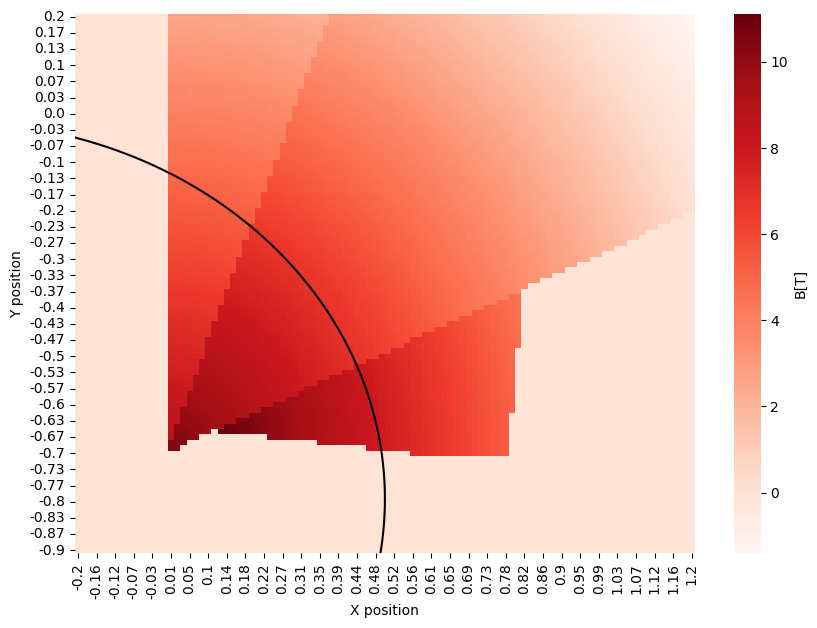

In [44]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({

    'x': x_li,
    'y': y_li,
    'values': mag_field
})

pivot_table = df.pivot(index='y', columns='x', values='values')
pivot_table = pivot_table.iloc[::-1] # Reverse the order of rows

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pivot_table, cbar_kws={'label': 'B[T]'},cmap="Reds", ax=ax)

plt.xlabel("X position") 
plt.ylabel("Y position") 

a = X_min * min(len(pivot_table.columns), len(pivot_table.index))
b = Y_min * min(len(pivot_table.columns), len(pivot_table.index))
r = 0.7

# Adjust the radius to match the DataFrame indices
r_adj = r * min(len(pivot_table.columns), len(pivot_table.index))

stepSize = 0.01

positions = []
t = 0
while t < 2 * math.pi:
    positions.append((r_adj * math.cos(t) + a, r_adj * math.sin(t) + b))
    t += stepSize


X = []
Y = []
for i in positions:
    x, y = i
    X.append(x)
    Y.append(-y)

ax.plot(X, Y, color='black')

plt.show()

In [51]:
import pandas as pd

# Suppose df is your DataFrame
df = pd.read_csv("test - Sheet1.csv",header=None)


# Extract first column into a list
alpha = df.iloc[:, 0].tolist()

# Extract remaining columns into a list of lists
li = df.iloc[:, 1:].values.tolist()


li

[[0.6, 2.0], [0.4, -2.0], [0.5, 1.0]]

In [52]:
d = dict()

for i in range(len(li[0])):
    d[i] = []
    for j in range(len(li)):
        try:
            d[i].append(li[j][i])
        except IndexError:
            d[i].append(0)

B = d[0]

try:
    G = d[1]
except KeyError:
    G = []
    for i in range(len(li)):
        G.append(0)



In [69]:

def get_B(R, A, B, G, P, trims):
    # Step 1: check what point it is
    x = P[0]
    y = P[1]
    beta1 = trims[0]
    beta2 = trims[1]
    left_trim_size = 0.138
    right_trim_size = 0.082
    
    # Initialize output
    Bout = 0
    
    # Update output, if needed
    for k in range(len(A)):
        m1 = math.tan(math.pi/2 - float(A[k][0]))
        m2 = math.tan(math.pi/2 - float(A[k][1]))
        
        if y < m1*x - R and y >= m2*x - R:  # if P is in Area k
            if k != len(A) - 1:  # NOT in the last area (exit area)
                d = math.sqrt(x**2 + (y-(-R))**2)
                h = R - d
                Bout = B[k]+ G[k]*h
                break
            elif k == len(A) - 1:  # in the last area (exit area)
                if y >= math.tan(-beta1)*x + (-R-math.tan(-beta1)*(R-left_trim_size)) and \
                        y >= math.tan(beta2)*x + (-R-math.tan(beta2)*(R+right_trim_size)):  # inside magnet
                    d = math.sqrt(x**2 + (y-(-R))**2)
                    h = R - d
                    Bout = B[k] + G[k]*h
                    break
    
    return Bout

In [72]:

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def default():

    R = 0.7
    a = [0.39, 0.4, 0.5]
    P = [0.2, -0.5]
    trims = [0.1, math.pi/2-0.1 ]
   #li = [[0.6,0.4], [0.5, 2], [-2,1]]
    li = [[1, 0], [0.5, -2], [2,0.3]]


    X_min = -0.2
    X_max = R + 0.5
    Y_min = -R-0.2
    Y_max = 0.2


    d = dict()


    for i in range(len(li[0])):
        d[i] = []

        for j in range(len(li)):
            try:
                d[i].append(li[j][i])
            except IndexError:
                d[i].append(0)


    B = d[0]
    try:
        G = d[1]
    except KeyError:
        G = []
        for i in range(len(li)):
            G.append(0)
    
    A = []
    curr = 0
    for i in range(len(a)):
        A.append([curr, curr + float(a[i])])
        curr += float(a[i])
    

    X = np.linspace(X_min, X_max, num=100)
    Y = np.linspace(Y_min, Y_max, num=100)
    xx, yy = np.meshgrid(X, Y)


    x_li = []
    y_li = []
    mag_field = []

    for x,y in zip(xx,yy):
        for xx,yy in zip(x,y):
            x_li.append(round(xx,2))
            y_li.append(round(yy,2))
            P = xx, yy
            mag_field.append(get_B(R, A, B, G, P, trims))


    df = pd.DataFrame({

        'x': x_li,
        'y': y_li,
        'values': mag_field
    })

    pivot_table = df.pivot(index='y', columns='x', values='values')
    pivot_table = pivot_table.iloc[::-1] # Reverse the order of rows

    fig, ax = plt.subplots(figsize=(10,7))
    sns.heatmap(pivot_table, cbar_kws={'label': 'B[T]'},cmap="Reds", ax=ax)

    plt.xlabel("X position") 
    plt.ylabel("Y position") 

    ax.set_aspect('equal')  # Ensure the aspect ratio is equal

    # Set number of ticks on the x-axis and y-axis
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))


    a = X_min * min(len(pivot_table.columns), len(pivot_table.index))
    b = Y_min * min(len(pivot_table.columns), len(pivot_table.index))
    r = 0.7

    # Adjust the radius to match the DataFrame indices
    r_adj = r * min(len(pivot_table.columns), len(pivot_table.index))

    stepSize = 0.01

    positions = []
    t = 0
    while t < 2 * math.pi:
        positions.append((r_adj * math.cos(t) + a, r_adj * math.sin(t) + b))
        t += stepSize


    X = []
    Y = []
    for i in positions:
        x, y = i
        X.append(x)
        Y.append(-y)

    ax.plot(X, Y, color='black')

    plt.show()

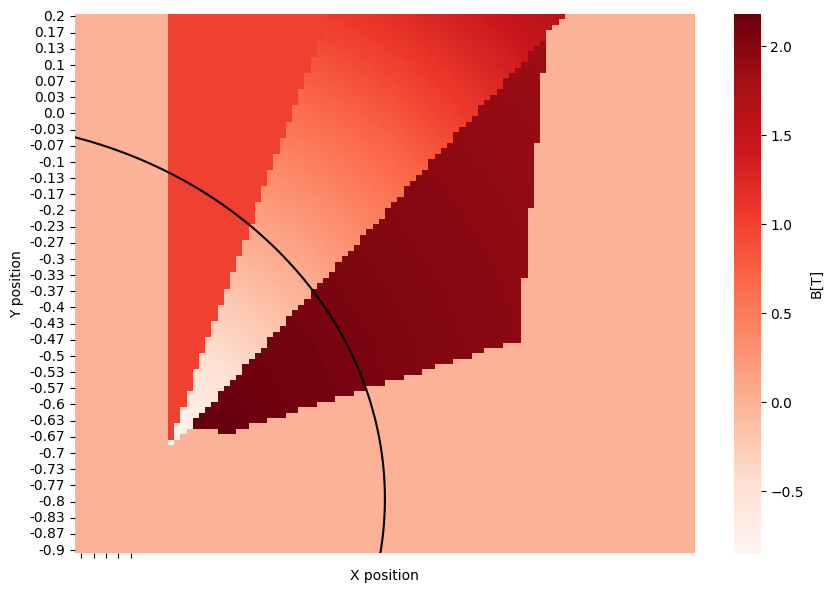

None


In [73]:
print(default())